### Import Libraries and Read Dataset

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df = pd.read_csv('cars_data.csv')
print(df.head())

   S.No.                              Name    Location    Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010.0   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015.0   
2      2                      Honda Jazz V     Chennai  2011.0   
3      3                 Maruti Ertiga VDI     Chennai  2012.0   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013.0   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0            72000.0       CNG       Manual      First  26.6 km/kg   998 CC   
1            41000.0    Diesel       Manual      First  19.67 kmpl  1582 CC   
2            46000.0    Petrol       Manual      First   18.2 kmpl  1199 CC   
3            87000.0    Diesel       Manual      First  20.77 kmpl  1248 CC   
4            40670.0    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7

### 1. Check for Duplication

In [2]:
duplicates = df.duplicated()
print(df[duplicates])

Empty DataFrame
Columns: [S.No., Name, Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, New_Price, Price]
Index: []


In [3]:
num_duplicates = df.duplicated().sum()
percentage_duplicates = (num_duplicates / len(df)) * 100

print(f"Number of duplicate rows: {num_duplicates}")
print(f"Percentage of duplicate rows: {percentage_duplicates:.2f}%")

Number of duplicate rows: 0
Percentage of duplicate rows: 0.00%


In [4]:
df = df.drop_duplicates()
print(df.head())

   S.No.                              Name    Location    Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010.0   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015.0   
2      2                      Honda Jazz V     Chennai  2011.0   
3      3                 Maruti Ertiga VDI     Chennai  2012.0   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013.0   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0            72000.0       CNG       Manual      First  26.6 km/kg   998 CC   
1            41000.0    Diesel       Manual      First  19.67 kmpl  1582 CC   
2            46000.0    Petrol       Manual      First   18.2 kmpl  1199 CC   
3            87000.0    Diesel       Manual      First  20.77 kmpl  1248 CC   
4            40670.0    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7

### 2. Missing Values Calculation

In [5]:
total_missing = df.isnull().sum().sum()
print(total_missing)

7636


In [6]:
missing_by_column = df.isnull().sum()
print(missing_by_column)

S.No.                   0
Name                    0
Location                0
Year                    1
Kilometers_Driven       1
Fuel_Type               2
Transmission            1
Owner_Type              2
Mileage                 3
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64


In [7]:
percentage_missing = (df.isnull().sum() / len(df)) * 100
print(percentage_missing)

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.013787
Kilometers_Driven     0.013787
Fuel_Type             0.027575
Transmission          0.013787
Owner_Type            0.027575
Mileage               0.041362
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64


### 3. Data Reduction (Some columns or variables can be dropped if they do not add value to our analysis.)

In [8]:
# Replace missing values
df['Price'].fillna(0, inplace=True)
df['New_Price'].fillna(0, inplace=True)
df.dropna(inplace=True) # Dropping few inconsequntial records

      S.No.    Year  Kilometers_Driven  Seats  Price
0         0  2010.0            72000.0    5.0   1.75
1         1  2015.0            41000.0    5.0  12.50
2         2  2011.0            46000.0    5.0   4.50
3         3  2012.0            87000.0    7.0   6.00
4         4  2013.0            40670.0    5.0  17.74
...     ...     ...                ...    ...    ...
7248   7248  2011.0            89411.0    5.0   0.00
7249   7249  2015.0            59000.0    5.0   0.00
7250   7250  2012.0            28000.0    5.0   0.00
7251   7251  2013.0            52262.0    5.0   0.00
7252   7252  2014.0            72443.0    5.0   0.00

[7191 rows x 5 columns]


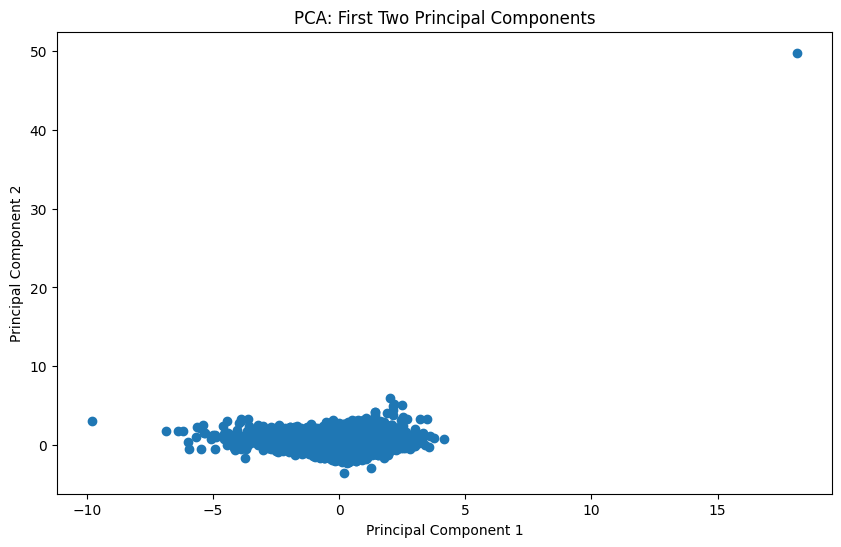

In [19]:
# Drop irrelevant columns for analysis
cols_to_drop = ['Name','Location','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','New_Price']
dropdf = df.drop(columns=cols_to_drop)
print(dropdf)
scaler = StandardScaler()
cars_data_scaled = scaler.fit_transform(dropdf)

# Apply Principal Component Analysis (PCA) for dimensionality reduction
pca = PCA(n_components=2)
cars_pca = pca.fit_transform(cars_data_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(cars_pca[:, 0], cars_pca[:, 1])
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


### 4. Feature Engineering

In [10]:
selected_features = df[['S.No.', 'Kilometers_Driven', 'Seats', 'Price']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

num_components = 2
pca = PCA(n_components=num_components)
reduced_features = pca.fit_transform(scaled_features)
reduced_features_df = pd.DataFrame(data=reduced_features, columns=['PC1', 'PC2'])
final_data = pd.concat([df, reduced_features_df], axis=1)
print(final_data.head())

   S.No.                              Name    Location    Year  \
0    0.0            Maruti Wagon R LXI CNG      Mumbai  2010.0   
1    1.0  Hyundai Creta 1.6 CRDi SX Option        Pune  2015.0   
2    2.0                      Honda Jazz V     Chennai  2011.0   
3    3.0                 Maruti Ertiga VDI     Chennai  2012.0   
4    4.0   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013.0   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0            72000.0       CNG       Manual      First  26.6 km/kg   998 CC   
1            41000.0    Diesel       Manual      First  19.67 kmpl  1582 CC   
2            46000.0    Petrol       Manual      First   18.2 kmpl  1199 CC   
3            87000.0    Diesel       Manual      First  20.77 kmpl  1248 CC   
4            40670.0    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price       PC1       PC2  
0  58.16 bhp    5.0          0   1.75  0.746503 -0.304137  
1  126.2

### 5. Creating Features

In [11]:
cars_df = df.copy()
cars_df['Brand'] = cars_df['Name'].str.split().str[0]
cars_df['Mileage'] = cars_df['Mileage'].str.split().str[0]
cars_df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
current_year = datetime.now().year
cars_df['Age'] = current_year - cars_df['Year']
cars_df['Price_per_Mile'] = cars_df['Price'] / cars_df['Mileage']

print("\nCars Dataset with New Features:")
print(cars_df)


Cars Dataset with New Features:
      S.No.                                               Name    Location  \
0         0                             Maruti Wagon R LXI CNG      Mumbai   
1         1                   Hyundai Creta 1.6 CRDi SX Option        Pune   
2         2                                       Honda Jazz V     Chennai   
3         3                                  Maruti Ertiga VDI     Chennai   
4         4                    Audi A4 New 2.0 TDI Multitronic  Coimbatore   
...     ...                                                ...         ...   
7248   7248                  Volkswagen Vento Diesel Trendline   Hyderabad   
7249   7249                             Volkswagen Polo GT TSI      Mumbai   
7250   7250                             Nissan Micra Diesel XV     Kolkata   
7251   7251                             Volkswagen Polo GT TSI        Pune   
7252   7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi   

        Year  Kilometers_Drive

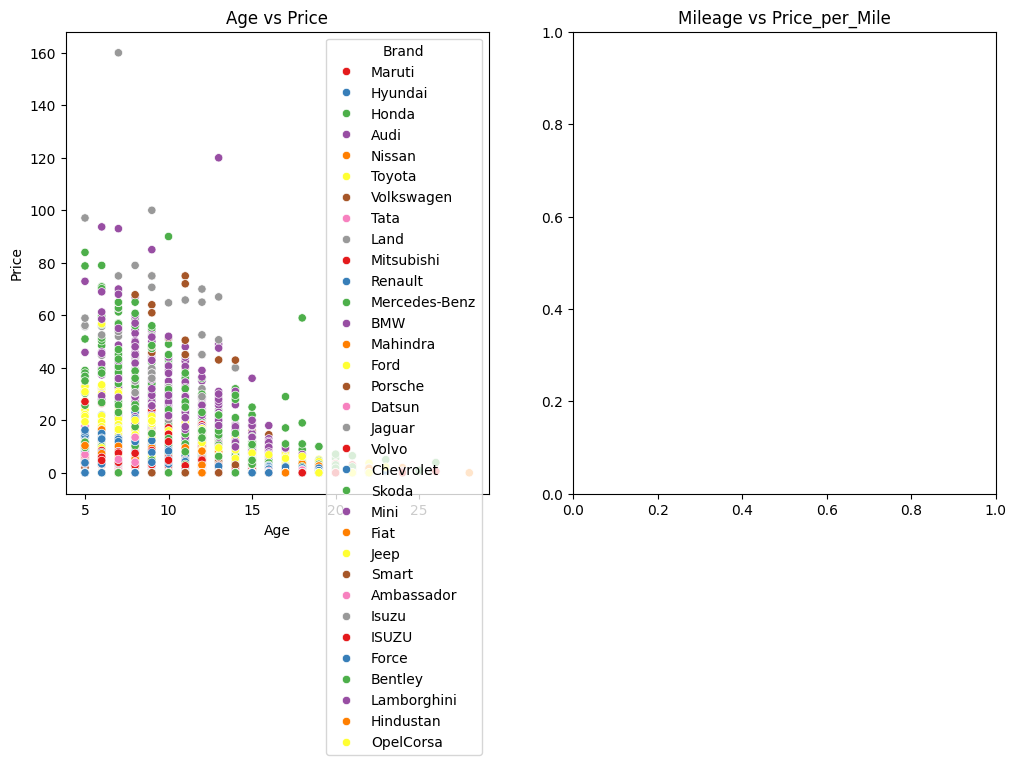

In [12]:
# Visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='Price', data=cars_df, hue='Brand', palette='Set1')
plt.title('Age vs Price')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Mileage', y='Price_per_Mile', data=cars_df, hue='Brand', palette='Set2')
plt.title('Mileage vs Price_per_Mile')

# plt.tight_layout()
plt.show()

### 6. Data Cleaning/Wrangling

In [13]:
clean_df = df.copy()

clean_df['Brand'] = clean_df['Name'].str.split().str[0]
clean_df['Engine'] = clean_df['Engine'].str.extract('(\d+)').astype(float)
clean_df['Mileage'] = clean_df['Mileage'].str.extract('(\d+)').astype(float)
clean_df['Power'] = clean_df['Power'].str.extract('(\d+)').astype(float)
clean_df['New_Price'] = clean_df['New_Price'].str.extract('(\d+)').astype(float)
clean_df['New_Price'].fillna(0, inplace=True)
current_year = datetime.now().year
clean_df['Mileage'][clean_df['Mileage']==0] = 1
clean_df['Age'] = current_year - clean_df['Year']
clean_df['Price_per_Mile'] = clean_df['Price'] / clean_df['Mileage']
clean_df = clean_df.drop(['Name', 'Year'], axis=1)

print("\nCleaned and Wrangled Dataset:")
print(clean_df)


Cleaned and Wrangled Dataset:
      S.No.    Location  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0         0      Mumbai            72000.0       CNG       Manual      First   
1         1        Pune            41000.0    Diesel       Manual      First   
2         2     Chennai            46000.0    Petrol       Manual      First   
3         3     Chennai            87000.0    Diesel       Manual      First   
4         4  Coimbatore            40670.0    Diesel    Automatic     Second   
...     ...         ...                ...       ...          ...        ...   
7248   7248   Hyderabad            89411.0    Diesel       Manual      First   
7249   7249      Mumbai            59000.0    Petrol    Automatic      First   
7250   7250     Kolkata            28000.0    Diesel       Manual      First   
7251   7251        Pune            52262.0    Petrol    Automatic      Third   
7252   7252       Kochi            72443.0    Diesel    Automatic      First   

      Mi

C:\Users\Anita Singh\AppData\Local\Temp\ipykernel_3404\4289707105.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Mileage'][clean_df['Mileage']==0] = 1


### 7. Statistics Summary (Count, Mean, Standard Deviation, median, mode, minimum value, maximum value, range, standard deviation) 

In [14]:
print("Dataset Information:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 7191 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7191 non-null   int64  
 1   Name               7191 non-null   object 
 2   Location           7191 non-null   object 
 3   Year               7191 non-null   float64
 4   Kilometers_Driven  7191 non-null   float64
 5   Fuel_Type          7191 non-null   object 
 6   Transmission       7191 non-null   object 
 7   Owner_Type         7191 non-null   object 
 8   Mileage            7191 non-null   object 
 9   Engine             7191 non-null   object 
 10  Power              7191 non-null   object 
 11  Seats              7191 non-null   float64
 12  New_Price          7191 non-null   object 
 13  Price              7191 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 1.1+ MB
None

Summary Statistics:
             S.No.   

In [15]:
cars_data = dropdf.copy()
summary_stats = {
    'Count': cars_data.shape[0],
    'Mean': cars_data.mean(),
    'Standard Deviation': cars_data.std(),
    'Median': cars_data.median(),
    'Mode': cars_data.mode().iloc[0], 
    'Minimum Value': cars_data.min(),
    'Maximum Value': cars_data.max(),
    'Range': cars_data.max() - cars_data.min(),
}
summary_df = pd.DataFrame(summary_stats)

print("\nStatistics Summary:")
print(summary_df)


Statistics Summary:
                   Count          Mean  Standard Deviation   Median     Mode  \
S.No.               7191   3627.190655         2094.568997   3629.0      0.0   
Year                7191   2013.391322            3.235169   2014.0   2014.0   
Kilometers_Driven   7191  58606.050897        84711.727076  53226.0  60000.0   
Seats               7191      5.279516            0.811614      5.0      5.0   
Price               7191      7.888618           10.819356      4.7      0.0   

                   Minimum Value  Maximum Value      Range  
S.No.                        0.0         7252.0     7252.0  
Year                      1996.0         2019.0       23.0  
Kilometers_Driven          171.0      6500000.0  6499829.0  
Seats                        0.0           10.0       10.0  
Price                        0.0          160.0      160.0  


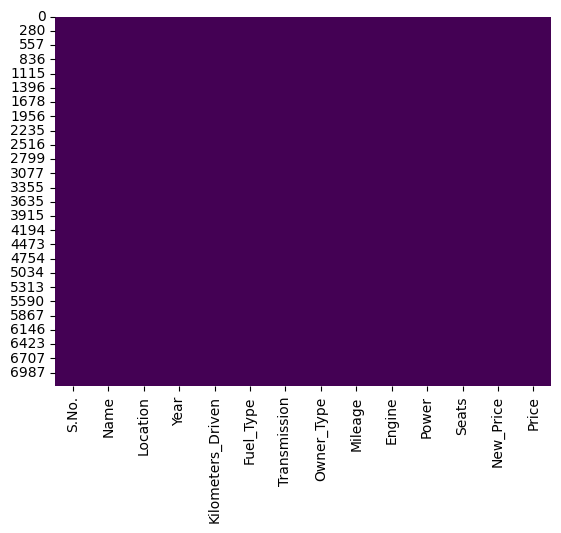

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()


### 8. Analyzing/visualizing the dataset by taking one variable at a time

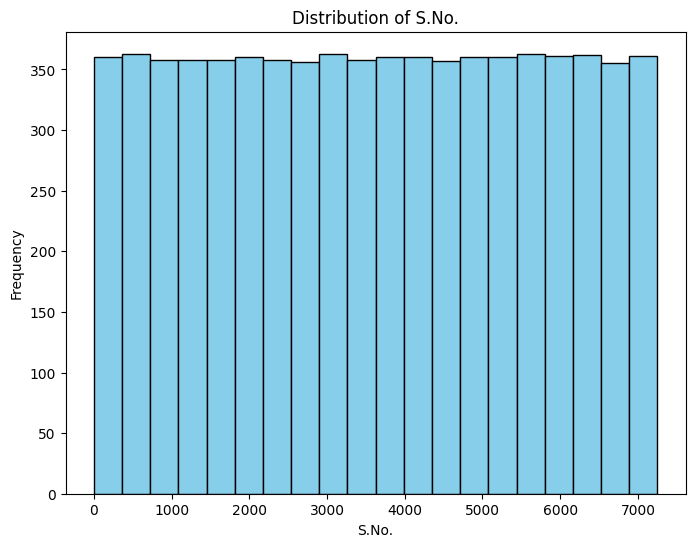

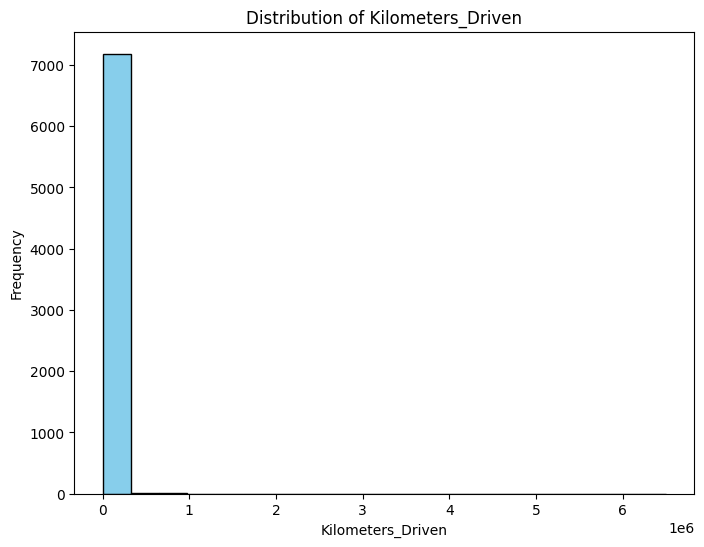

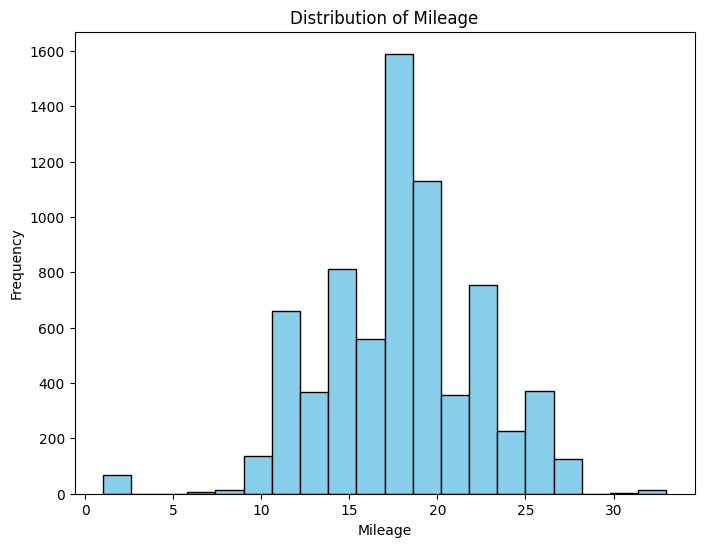

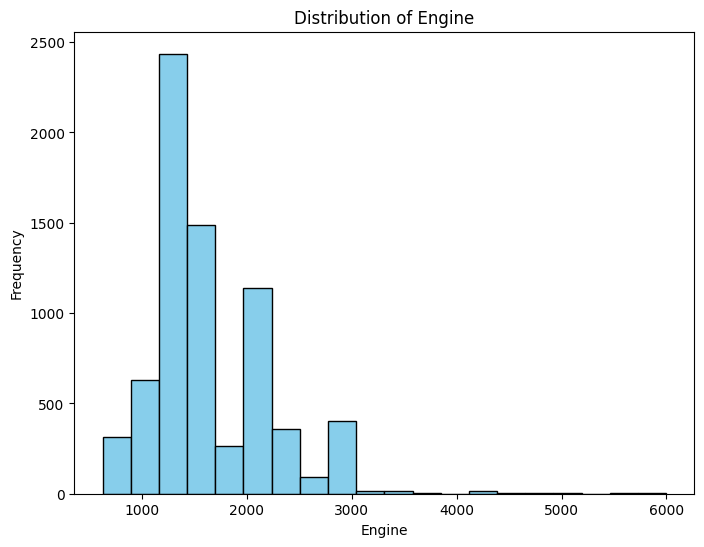

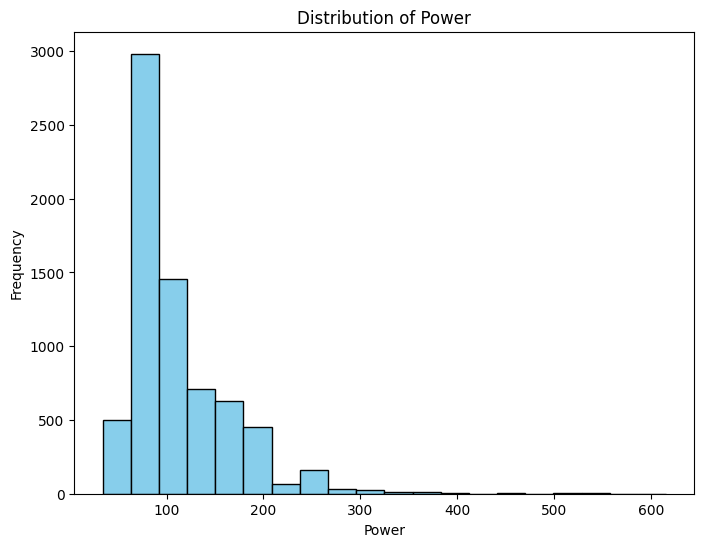

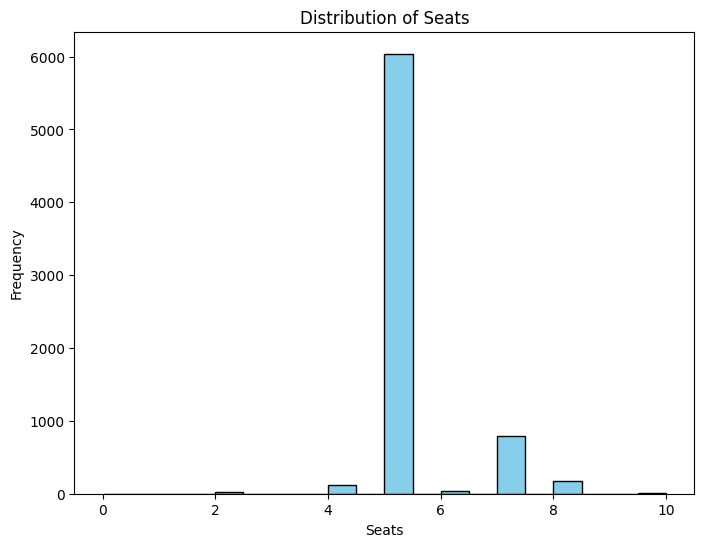

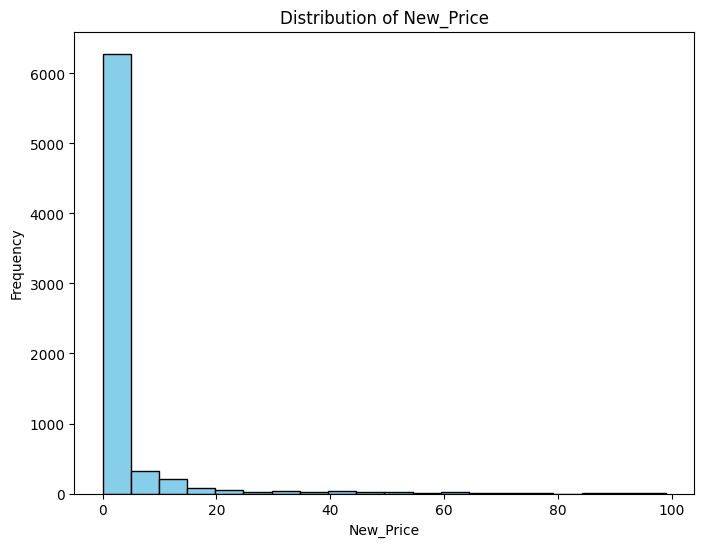

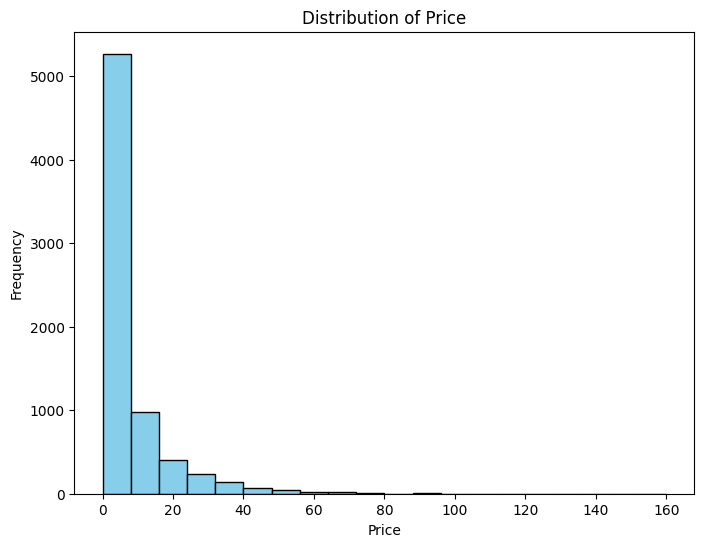

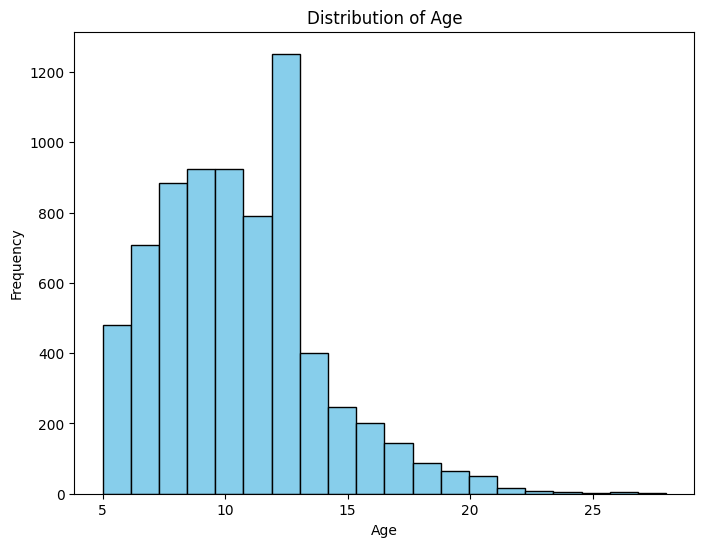

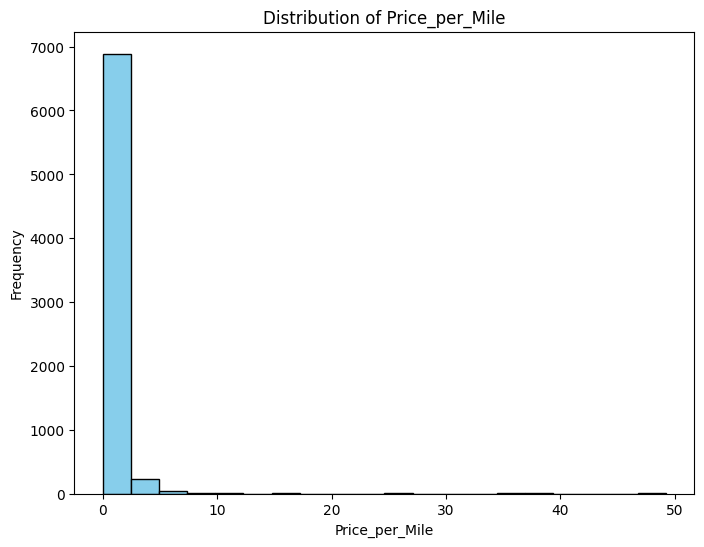

In [17]:
cars_data = clean_df.copy()
def visualize_variable(variable_name):
    plt.figure(figsize=(8, 6))
    plt.hist(cars_data[variable_name], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {variable_name}')
    plt.xlabel(variable_name)
    plt.ylabel('Frequency')
    plt.show()

numerical_variables = cars_data.select_dtypes(include='number').columns
for variable in numerical_variables:
    visualize_variable(variable)

### 9. Data Transformation

In [18]:
cars_data = clean_df.copy()
# Encode Categorical Variables
label_encoder = LabelEncoder()
cars_data['Brand'] = label_encoder.fit_transform(cars_data['Brand'])
cars_data['Fuel_Type'] = label_encoder.fit_transform(cars_data['Fuel_Type'])
cars_data['Transmission'] = label_encoder.fit_transform(cars_data['Transmission'])

# Scale Numerical Features
numerical_features = ['Price', 'Mileage', 'Engine']
scaler = StandardScaler()
cars_data[numerical_features] = scaler.fit_transform(cars_data[numerical_features])

print("\nTransformed Dataset:")
print(cars_data.head())


Transformed Dataset:
   S.No.    Location  Kilometers_Driven  Fuel_Type  Transmission Owner_Type  \
0      0      Mumbai            72000.0          0             1      First   
1      1        Pune            41000.0          1             1      First   
2      2     Chennai            46000.0          3             1      First   
3      3     Chennai            87000.0          1             1      First   
4      4  Coimbatore            40670.0          1             0     Second   

    Mileage    Engine  Power  Seats  New_Price     Price  Brand   Age  \
0  1.842662 -1.039810   58.0    5.0        0.0 -0.567413     19  14.0   
1  0.275923 -0.058350  126.0    5.0        0.0  0.426246     11   9.0   
2  0.052103 -0.702013   88.0    5.0        8.0 -0.313221     10  13.0   
3  0.499743 -0.619664   88.0    7.0        0.0 -0.174571     19  12.0   
4 -0.619356  0.590354  140.0    5.0        0.0  0.910596      1  11.0   

   Price_per_Mile  
0        0.067308  
1        0.657895  
2   